In [1]:
import pandas as pd
import numpy as np
import cv2 
import os
import itertools
import shutil
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
Data = glob('./Data/**/*.jpg', recursive=True)  #we extract only jpg files


In [3]:
print(len(Data))

5835


In [4]:
from PIL import Image #adds support for opening, manipulating, and saving many different image file formats
from tqdm import tqdm #adds progress bar for the loops
dimentions=list()
x=1
for images in (Data):
    dim = Image.open(images)
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>50): #going through all the images will take up lot of memory, so therefore we will check until we get three different dimentions.
        break
print(dimentions)


[(512, 512), (352, 321), (283, 231), (349, 292), (380, 310), (256, 256), (351, 262), (300, 289), (586, 467), (347, 300), (350, 272), (355, 311), (630, 504), (359, 297), (336, 300), (360, 319), (960, 781), (630, 630), (279, 258), (278, 236), (365, 306), (355, 320), (1427, 1275), (290, 250), (442, 353), (353, 300), (431, 400), (286, 241), (325, 300), (366, 310), (318, 273), (351, 273), (555, 526), (337, 293), (223, 226), (334, 283), (225, 225), (323, 276), (355, 290), (342, 273), (260, 194), (308, 244), (500, 377), (938, 864), (300, 263), (348, 287), (357, 283), (349, 300), (173, 189), (245, 224)]


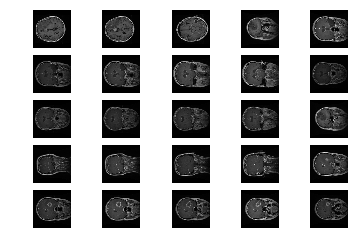

In [5]:
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

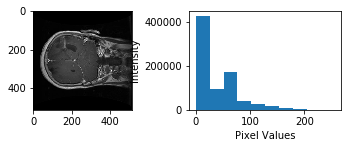

In [6]:
def hist_plot(image): #to plot histogram of pixel values present in an image VS intensities
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    plt.imshow(img)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
hist_plot(Data[29])
    

In [7]:
from tqdm import tqdm
import csv 

Data_output=list()
Data_output.append(["Classes"])

for file_name in tqdm(Data):
    if file_name[7] == 'G':
        Data_output.append([file_name[7:13]])
    elif file_name[7] == 'M':
        Data_output.append([file_name[7:17]])
    elif file_name[7] == 'N':
        Data_output.append([file_name[7:15]])
    elif file_name[7] == 'P':
        Data_output.append([file_name[7:16]])
    
with open("./output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])


100%|█████████████████████████████████████████████████████████████████████████| 5835/5835 [00:00<00:00, 1160664.13it/s]


In [8]:
from IPython.display import display # Allows the use of display() for DataFrames
data_output = pd.read_csv("./output.csv")
display(data_output.head())
print(data_output.shape)

,Classes
0,Glioma
1,Glioma
2,Glioma
3,Glioma
4,Glioma


(5835, 1)


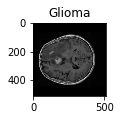

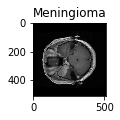

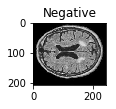

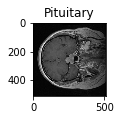

In [9]:
def view_images(image): #function to view an image
    image_cv = cv2.imread(image) #reads an image
    plt.imshow(image_cv); #displays an image

def class_output(images,x,i):  #to display image along with their labels
    fig = plt.figure()
    ax = plt.subplot(2,4,i)
    ax.set_title(data_output.loc[x].item())
    view_images(images)
    i+=1
    return

k=0 
l=0 
m=0
n=0
i=0 

for x in range(1,len(Data)):
    if(data_output.loc[x].item()=="Negative" and k!=1):
        k+=1
        i+=1
        class_output(Data[x],x,i)
        
    elif(data_output.loc[x].item()=="Meningioma" and l!=1):
        l+=1
        i+=1
        class_output(Data[x],x,i)
        
    elif(data_output.loc[x].item()=="Glioma" and m!=1):
        m+=1
        i+=1
        class_output(Data[x],x,i)
        
    elif(data_output.loc[x].item()=="Pituitary" and n!=1):
        n+=1
        i+=1
        class_output(Data[x],x,i)
        
    elif(k==0 or l==0 or m==0 or n==0):
        continue
    else:
        break

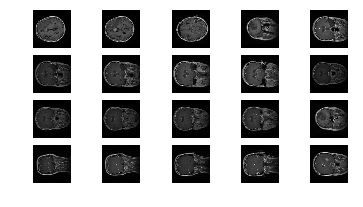

In [10]:
def vis_data(photos,a) :
    x=0
    beta=0
    for image in photos:
        image_cv = cv2.imread(image)
        fig=plt.figure(figsize=(50,50))
        ax=plt.subplot(2, 5, x+1)
        view_images(images)
        x+=1
        beta+=1
plot_images(Data[0:20])

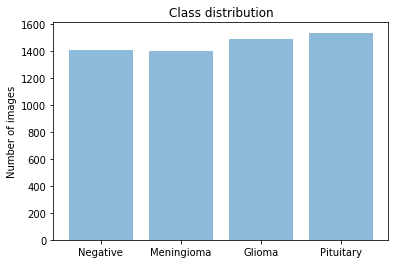

In [11]:
class3 = data_output[(data_output["Classes"]=="Pituitary" )].shape[0]
class2 = data_output[(data_output["Classes"]=="Glioma" )].shape[0]
class1 = data_output[(data_output["Classes"]=="Meningioma" )].shape[0]
class0 = data_output[(data_output["Classes"]=="Negative" )].shape[0]
objects=["Negative","Meningioma","Glioma","Pituitary"]
y_pos = np.arange(len(objects))
count=[class0,class1,class2,class3]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()

In [12]:
percent_class3=class3/len(Data)
percent_class2=class2/len(Data)
percent_class1=class1/len(Data)
percent_class0=class0/len(Data)
print("Total Class3 images :",class3)
print("Total Class2 images :",class2)
print("Total Class1 images :",class1)
print("Total Class0 images :",class0)
print("Percent of class 3 images : ", percent_class3*100)
print("Percent of class 2 images : ", percent_class2*100)
print("Percent of class 1 images : ", percent_class1*100)
print("Percent of class 0 images : ", percent_class0*100)

Total Class3 images : 1536
Total Class2 images : 1486
Total Class1 images : 1402
Total Class0 images : 1411
Percent of class 3 images :  26.32390745501285
Percent of class 2 images :  25.467009425878324
Percent of class 1 images :  24.027420736932307
Percent of class 0 images :  24.181662382176523


In [13]:
from sklearn.utils import shuffle #to shuffle the data
Data,data_output= shuffle(Data,data_output)


In [14]:
from tqdm import tqdm
data=[]

for img in tqdm(Data):
    image_ar = cv2.imread(img)
    data.append(cv2.resize(image_ar,(250,250),interpolation=cv2.INTER_CUBIC))

100%|█████████████████████████████████████████████████████████████████████████████| 5835/5835 [00:23<00:00, 247.97it/s]


In [15]:
y_train = pd.read_csv('./output.csv')

In [16]:
data_output=data_output.replace(to_replace="Negative",value=0)
data_output=data_output.replace(to_replace="Meningioma",value=1)
data_output=data_output.replace(to_replace="Glioma",value=2)
data_output=data_output.replace(to_replace="Pituitary",value=3)

In [17]:
from keras.utils import to_categorical #to hot encode the output labels
data_output_encoded =to_categorical(data_output, num_classes=4)
print(data_output_encoded.shape)

(5835, 4)


In [18]:
data=np.array(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, data_output_encoded, test_size=0.4)

#hot encoding them
Y_train_encoded = to_categorical(Y_train, num_classes = 4)
Y_test_encoded = to_categorical(Y_test, num_classes = 4)


print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 3501
Number of test files 2334
Number of train_target files 3501
Number of  test_target  files 2334


In [19]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5,shuffle=True)


In [20]:
print("Number of train files",len(X_train))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_test))
print("Number of  test_target  files",len(Y_test))

Number of train files 3501
Number of valid files 1167
Number of train_target files 3501
Number of  valid_target  files 1167
Number of test files 1167
Number of  test_target  files 1167


In [21]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train,Y_train)


In [22]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(3501, 4)
(1167, 4)
(1167, 4)


In [23]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_valid.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_test.shape)

Training Data Shape: (3501, 250, 250, 3)
Validation Data Shape: (1167, 250, 250, 3)
Testing Data Shape: (1167, 250, 250, 3)
Training Label Data Shape: (3501, 4)
Validation Label Data Shape: (1167, 4)
Testing Label Data Shape: (1167, 4)


In [38]:
import itertools #create iterators for effective looping
#Plotting the confusion matrix for checking the accuracy of the model
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    print(cm)
#     plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


-----------

# CNN

In [26]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #Import layers for the model
from keras.layers import Dropout, Flatten, Dense, LeakyReLU, PReLU
import keras
from keras.models import Sequential #Our model will be Sequential

model = Sequential()

# First Layer
model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same',activation='tanh',input_shape=(250,250,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))


model.add(Flatten()) #Flattens the matrix into a vector
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax')) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
__________

In [27]:
model.compile(optimizer= 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) #Compiling the model


In [38]:
from keras.callbacks import ModelCheckpoint  #Checkpoint to save the best weights of the model.

checkpointer = ModelCheckpoint(filepath='./Models/model_1.h5', 
                               monitor = "val_acc", 
                               mode = "max",
                               verbose=1, 
                               save_best_only=True) 

earlystop = EarlyStopping(monitor = 'val_acc', # value being monitored for improvement
                          mode = "max",
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 30, #Number of epochs we wait before stopping 
                          verbose = 1) #keeps the best weigths once stopped

history = model.fit(X_train, Y_train, 
          validation_data=(X_valid, Y_valid),
          epochs=100, batch_size=32, callbacks=[earlystop, checkpointer], verbose=2,shuffle=True)

Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 13s - loss: 1.1587 - acc: 0.4941 - val_loss: 0.8026 - val_acc: 0.6787

Epoch 00001: val_acc improved from -inf to 0.67866, saving model to ./Models/model_1.h5
Epoch 2/100
 - 13s - loss: 0.7219 - acc: 0.7255 - val_loss: 0.5231 - val_acc: 0.8072

Epoch 00002: val_acc improved from 0.67866 to 0.80720, saving model to ./Models/model_1.h5
Epoch 3/100
 - 42s - loss: 0.5447 - acc: 0.7809 - val_loss: 0.4595 - val_acc: 0.8183

Epoch 00003: val_acc improved from 0.80720 to 0.81834, saving model to ./Models/model_1.h5
Epoch 4/100
 - 83s - loss: 0.4586 - acc: 0.8221 - val_loss: 0.3922 - val_acc: 0.8380

Epoch 00004: val_acc improved from 0.81834 to 0.83805, saving model to ./Models/model_1.h5
Epoch 5/100
 - 82s - loss: 0.4079 - acc: 0.8406 - val_loss: 0.3457 - val_acc: 0.8655

Epoch 00005: val_acc improved from 0.83805 to 0.86547, saving model to ./Models/model_1.h5
Epoch 6/100
 - 83s - loss: 0.3533 - acc: 0.8615 - val_loss: 0.3966 - v

In [39]:
# took 4136 seconds to train (1 hr 8 min 56 sec)
model.load_weights('./Models/model_1.h5')

In [40]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc)

Model Accuracy: 0.9263


In [41]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|█████████████████████████| 1167/1167 [00:04<00:00, 284.98it/s]


[[289  13   1   2]
 [ 14 241   7   8]
 [  1  22 252   0]
 [  3  15   0 299]]


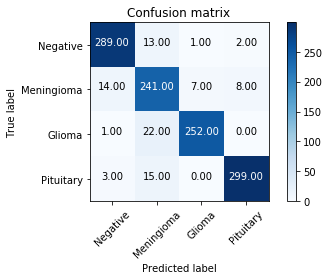

In [45]:
from sklearn.metrics import confusion_matrix #to plot confusion matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_bench=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions))
plot_confusion_matrix(cnf_matrix_bench, classes=class_names,
                      title='Confusion matrix')


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


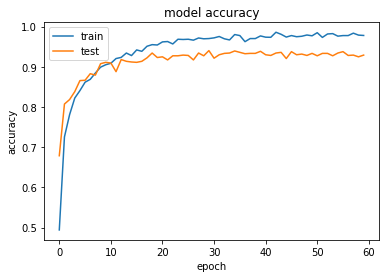

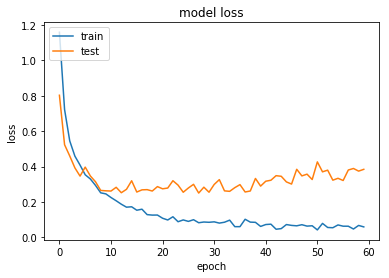

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

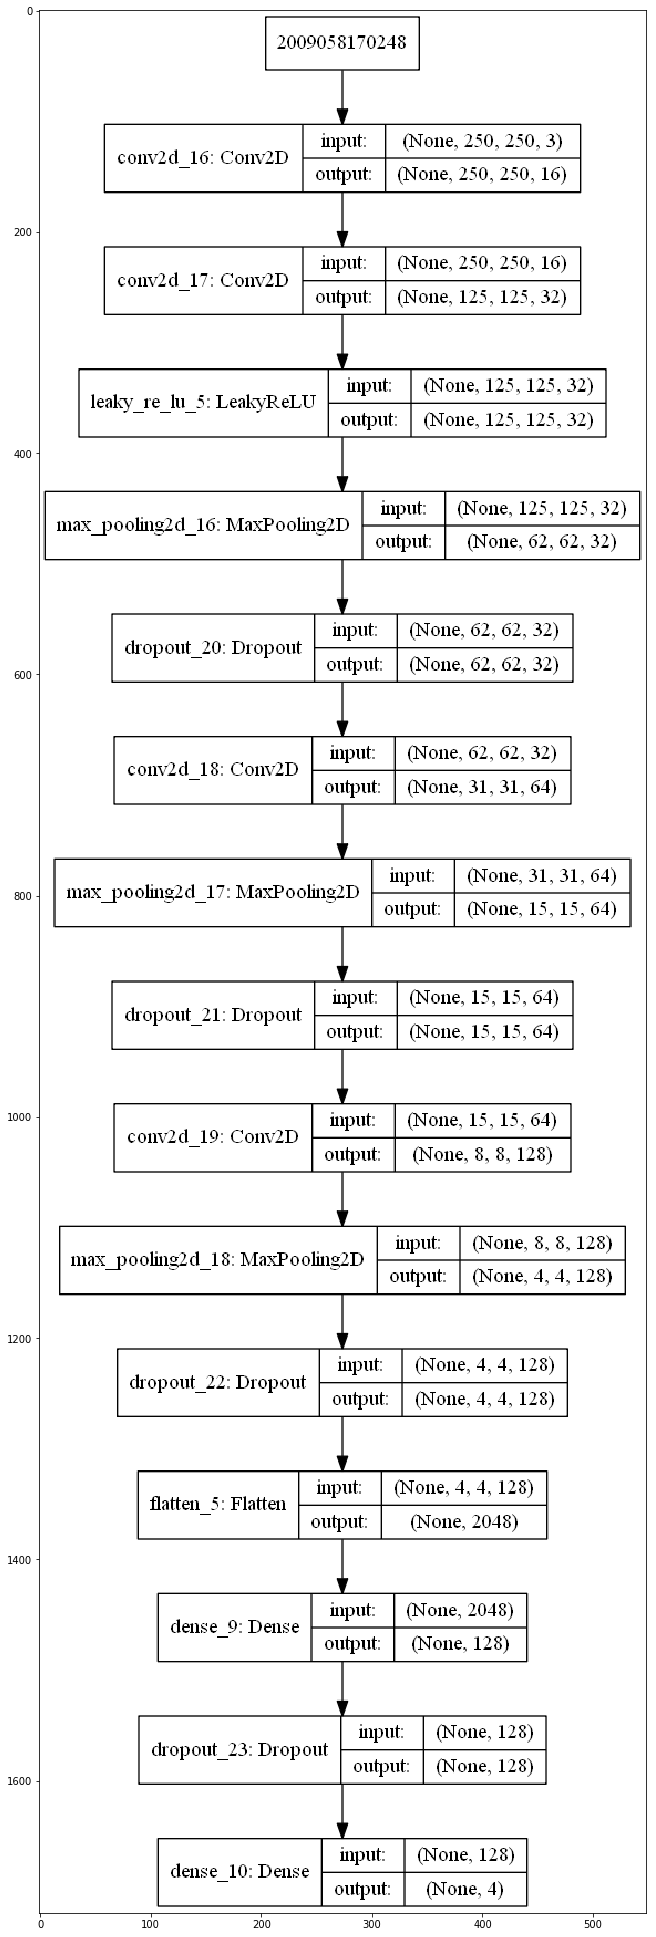

In [48]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='./Model_Architecture/model_1.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('./Model_Architecture/model_1.png')
plt.figure(figsize=(50,35))
imgplot = plt.imshow(img)

## Model with Data Augmentation

In [35]:
from keras.preprocessing.image import ImageDataGenerator  #For Image argumentaton
datagen = ImageDataGenerator(
        shear_range=0.1,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        rescale=1/255.0,
        horizontal_flip=True)

In [25]:
X_valid_e=X_valid/255.0 #rescaling X_valid
X_test_e=X_test/255.0 #rescaling X_Test


In [55]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, LeakyReLU
from keras.models import Sequential

argum_model = Sequential()

argum_model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same',activation='tanh',input_shape=(250,250,3)))

argum_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same'))
argum_model.add(LeakyReLU(alpha=0.1))
argum_model.add(MaxPooling2D(pool_size=2,strides=2))
argum_model.add(Dropout(0.25))


argum_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(MaxPooling2D(pool_size=2,strides=2))
argum_model.add(Dropout(0.25))

argum_model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(MaxPooling2D(pool_size=2,strides=2))
argum_model.add(Dropout(0.25))


argum_model.add(Flatten()) #Flattens the matrix into a vector
argum_model.add(Dense(128, activation='relu')) 
argum_model.add(Dropout(0.25))
argum_model.add(Dense(4, activation='softmax'))

argum_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
__________

In [56]:
argum_model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])


In [32]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='./Models/model_2.h5', 
                               verbose=1, 
                               monitor = "val_acc",
                               mode = "max",
                               save_best_only=True)


earlystop = EarlyStopping(monitor = 'val_acc', # value being monitored for improvement
                          mode='max',
                          patience = 20, #Number of epochs we wait before stopping 
                          verbose = 1) #keeps the best weigths once stopped



In [60]:
batch_size=32
epochs=100
history1 = argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer, earlystop], verbose=2)

Epoch 1/100
 - 85s - loss: 1.2846 - acc: 0.3829 - val_loss: 1.1141 - val_acc: 0.5553

Epoch 00001: val_acc improved from -inf to 0.55527, saving model to ./Models/model_2.h5
Epoch 2/100
 - 84s - loss: 1.1595 - acc: 0.5012 - val_loss: 0.9652 - val_acc: 0.6110

Epoch 00002: val_acc improved from 0.55527 to 0.61097, saving model to ./Models/model_2.h5
Epoch 3/100
 - 83s - loss: 0.9774 - acc: 0.6031 - val_loss: 0.8938 - val_acc: 0.6118

Epoch 00003: val_acc improved from 0.61097 to 0.61183, saving model to ./Models/model_2.h5
Epoch 4/100
 - 82s - loss: 0.8801 - acc: 0.6468 - val_loss: 0.7528 - val_acc: 0.6949

Epoch 00004: val_acc improved from 0.61183 to 0.69494, saving model to ./Models/model_2.h5
Epoch 5/100
 - 82s - loss: 0.8174 - acc: 0.6714 - val_loss: 0.8263 - val_acc: 0.6632

Epoch 00005: val_acc did not improve from 0.69494
Epoch 6/100
 - 83s - loss: 0.7700 - acc: 0.7042 - val_loss: 0.5891 - val_acc: 0.7755

Epoch 00006: val_acc improved from 0.69494 to 0.77549, saving model to ./

In [57]:
#5214 (1hr 26min 54 sec)
argum_model.load_weights('./Models/model_2.h5')


In [60]:
X_test_e  = X_test/255.0

In [61]:
_, acc1 = argum_model.evaluate(X_test_e, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc1)

Model Accuracy: 0.9460


In [63]:
predictions_arg = [np.argmax(argum_model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|█████████████████████████| 1167/1167 [00:08<00:00, 135.15it/s]


[[305   0   0   0]
 [  6 232  10  22]
 [  1  27 242   5]
 [  1   5   1 310]]


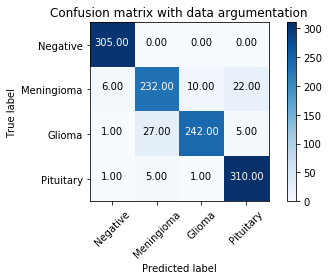

In [64]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_arg))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix with data argumentation')

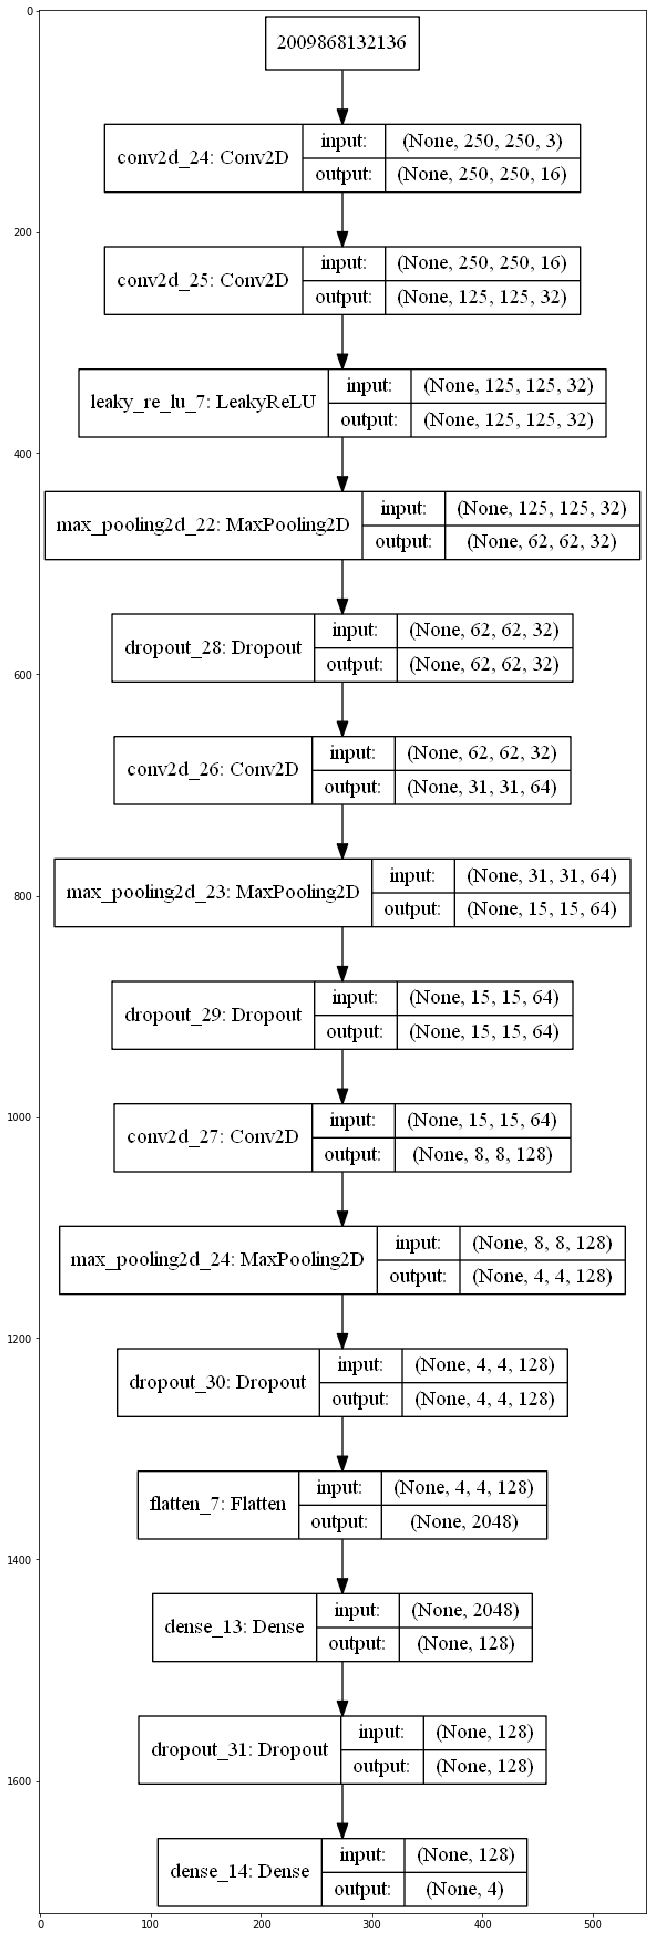

In [65]:
plot_model(argum_model, to_file='./Model_Architecture/model_2.png', show_shapes=True, show_layer_names=True)
img1 = mpimg.imread('./Model_Architecture/model_2.png')
plt.figure(figsize=(50,35))
imgplot = plt.imshow(img1)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


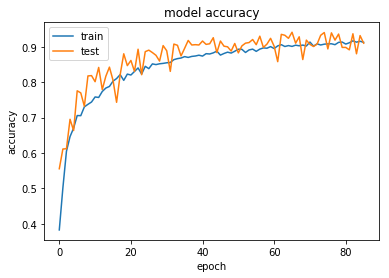

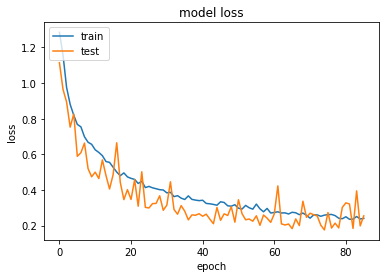

In [69]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-----------

## Transfer Learning VGG16 with DA


In [33]:
from keras.applications.vgg16 import VGG16,preprocess_input
vgg16 = VGG16(include_top=False,weights='imagenet',input_shape=(250,250,3))


for layer in vgg16.layers:
    layer.trainable = False


In [38]:
train_datagen = ImageDataGenerator(
    shear_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    zoom_range=0.1,
    rescale=1/255.0,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

In [35]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential



model0 = Sequential()

model0.add(vgg16)




model0.add(Flatten())

model0.add(Dense(128, activation='relu')) 
model0.add(Dropout(0.25))

model0.add(Dense(4, activation='softmax'))



model0.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 516       
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
model0.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])


In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=20
)


cp1 = ModelCheckpoint(filepath='./Models/model_3.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [39]:
import gc
gc.collect()

0

In [41]:
import timeit
import datetime

epochs = 100

batch_size = 32

history2 =model0.fit_generator(train_datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=32,
          epochs=epochs,validation_steps = 32,callbacks=[es1, cp1], verbose=2)



Epoch 1/100
 - 36s - loss: 0.7746 - acc: 0.7113 - val_loss: 0.6385 - val_acc: 0.7498

Epoch 00001: val_acc improved from 0.73693 to 0.74979, saving model to ./Models/model_3.h5
Epoch 2/100
 - 26s - loss: 0.6856 - acc: 0.7461 - val_loss: 0.5225 - val_acc: 0.8115

Epoch 00002: val_acc improved from 0.74979 to 0.81148, saving model to ./Models/model_3.h5
Epoch 3/100
 - 30s - loss: 0.6977 - acc: 0.7051 - val_loss: 0.5087 - val_acc: 0.8192

Epoch 00003: val_acc improved from 0.81148 to 0.81919, saving model to ./Models/model_3.h5
Epoch 4/100
 - 32s - loss: 0.6400 - acc: 0.7471 - val_loss: 0.4703 - val_acc: 0.8372

Epoch 00004: val_acc improved from 0.81919 to 0.83719, saving model to ./Models/model_3.h5
Epoch 5/100
 - 33s - loss: 0.6133 - acc: 0.7695 - val_loss: 0.4200 - val_acc: 0.8766

Epoch 00005: val_acc improved from 0.83719 to 0.87661, saving model to ./Models/model_3.h5
Epoch 6/100
 - 33s - loss: 0.5543 - acc: 0.7861 - val_loss: 0.4688 - val_acc: 0.8243

Epoch 00006: val_acc did not 

In [42]:
# 3071 (51 min 11 sec)
model0.load_weights('./Models/model_3.h5')

In [44]:
_, acc2 = model0.evaluate(X_test_e, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc2)

Model Accuracy: 0.8997


In [45]:
predictions_nm = [np.argmax(model0.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|██████████████████████████| 1167/1167 [00:19<00:00, 60.76it/s]


[[313   1   0   0]
 [ 12 205   9  24]
 [  4  57 233   5]
 [  1   4   0 299]]


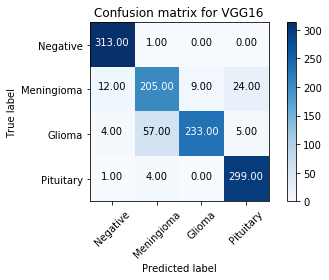

In [46]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_nm))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for VGG16')

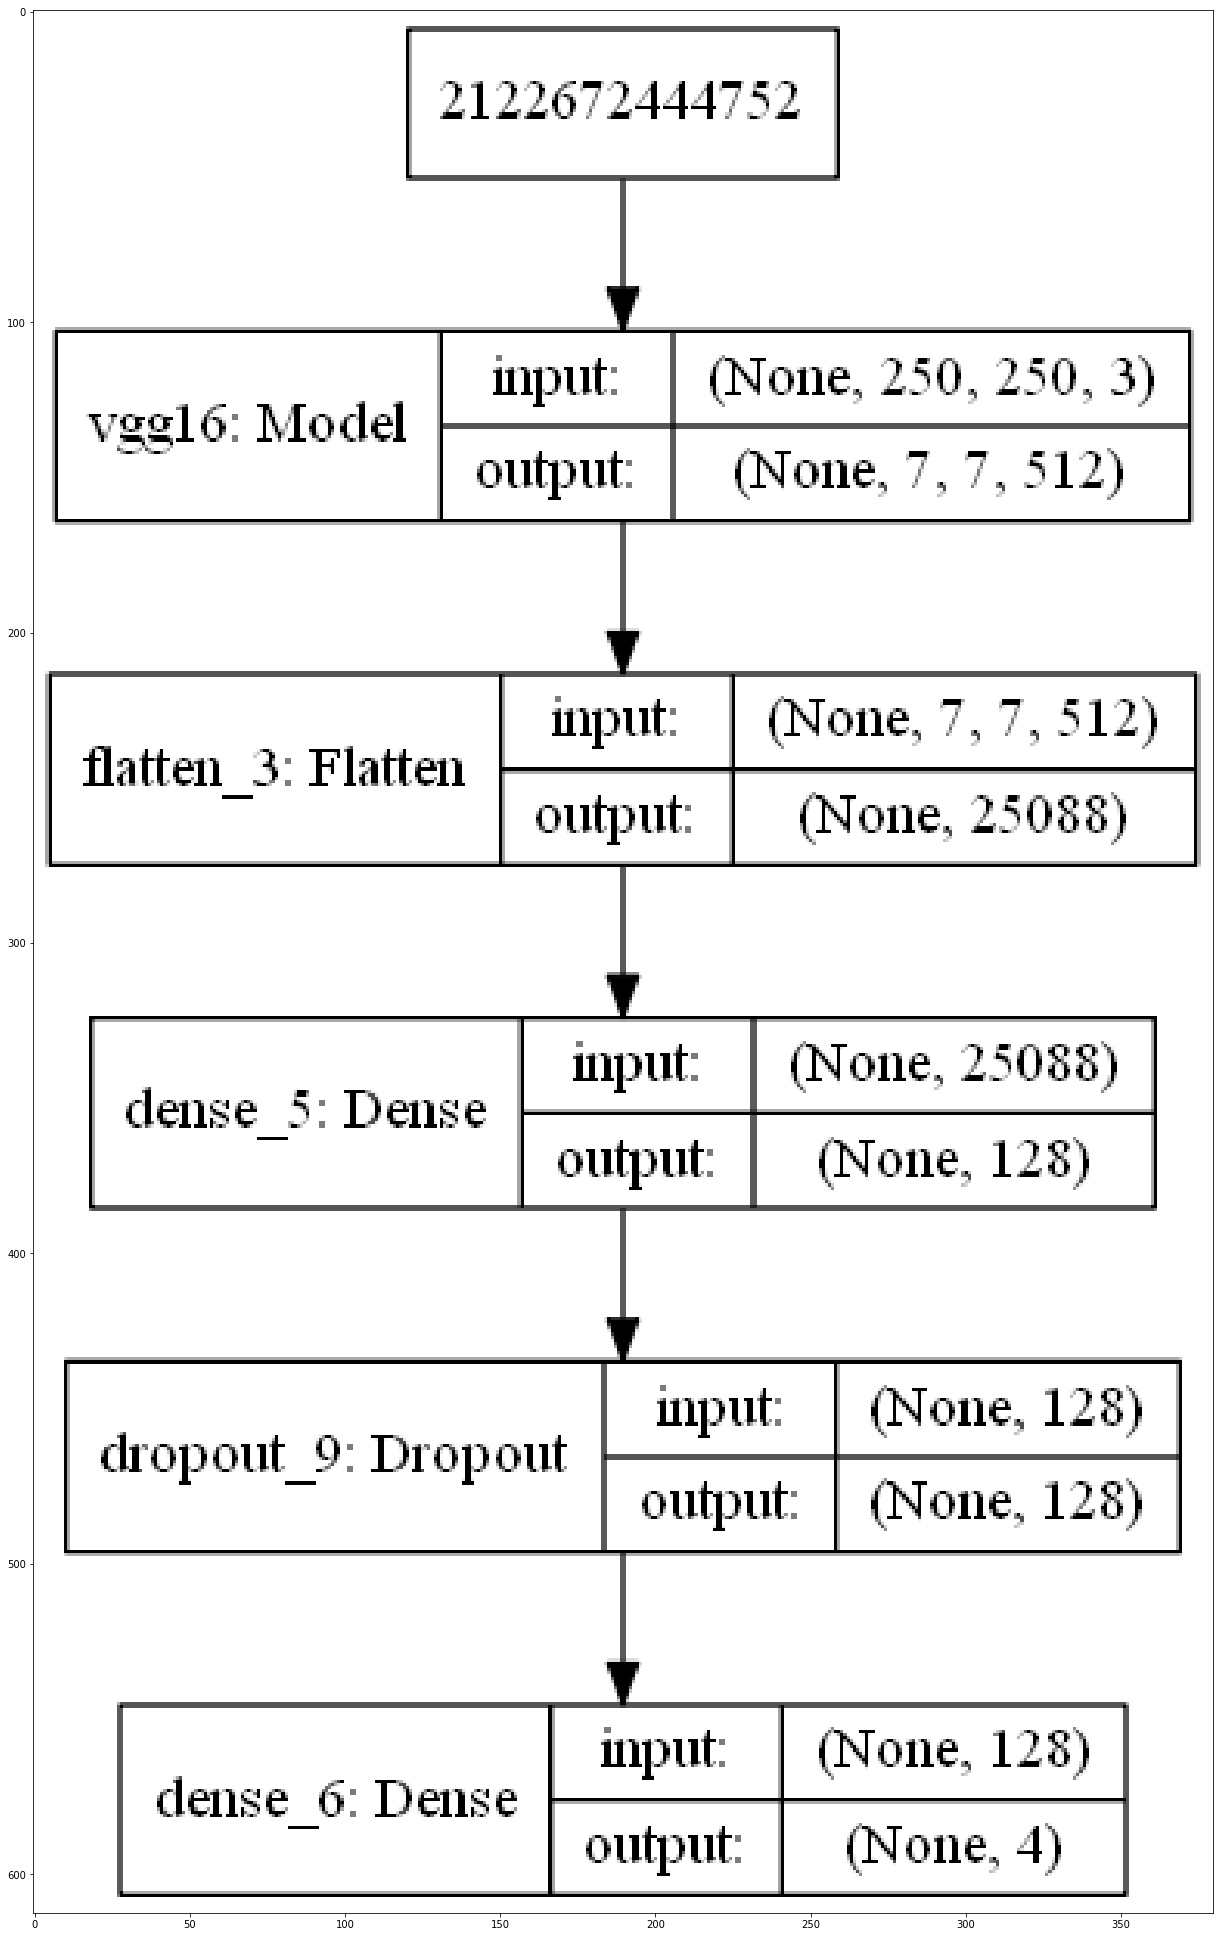

In [47]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model0, to_file='./Model_Architecture/model_3.png', show_shapes=True, show_layer_names=True)
img2 = mpimg.imread('./Model_Architecture/model_3.png')
plt.figure(figsize=(50,35))
imgplot = plt.imshow(img2)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


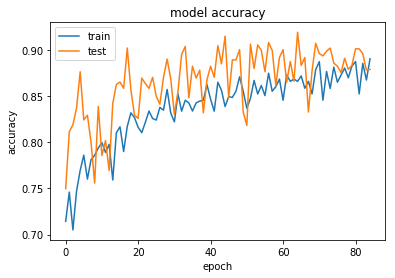

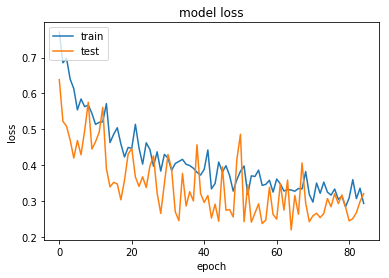

In [48]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

----------

### Transfer Learning VGG19 with DA


In [57]:
from keras.applications.vgg19 import VGG19
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(250,250,3))


for layer in vgg19.layers:
    layer.trainable = False


In [66]:
model1 = Sequential()
model1.add(vgg19)
model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(4, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total para

In [67]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='AdaDelta',
    metrics=['accuracy']
)

In [68]:
es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=30
)


cp1 = ModelCheckpoint(filepath='./Models/model_4.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [69]:
epochs = 100
history3 =model1.fit_generator(train_datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=32,
          epochs=epochs,validation_steps = 32,callbacks=[es1, cp1], verbose=2)

Epoch 1/100
 - 32s - loss: 1.8931 - acc: 0.3457 - val_loss: 1.2061 - val_acc: 0.3916

Epoch 00001: val_acc improved from -inf to 0.39160, saving model to ./Models/model_4.h5
Epoch 2/100
 - 26s - loss: 1.2614 - acc: 0.3960 - val_loss: 1.0185 - val_acc: 0.5930

Epoch 00002: val_acc improved from 0.39160 to 0.59297, saving model to ./Models/model_4.h5
Epoch 3/100
 - 29s - loss: 1.1764 - acc: 0.4365 - val_loss: 0.8929 - val_acc: 0.6041

Epoch 00003: val_acc improved from 0.59297 to 0.60411, saving model to ./Models/model_4.h5
Epoch 4/100
 - 31s - loss: 1.0981 - acc: 0.4648 - val_loss: 0.8183 - val_acc: 0.7052

Epoch 00004: val_acc improved from 0.60411 to 0.70523, saving model to ./Models/model_4.h5
Epoch 5/100
 - 30s - loss: 1.0118 - acc: 0.5334 - val_loss: 0.8858 - val_acc: 0.5296

Epoch 00005: val_acc did not improve from 0.70523
Epoch 6/100
 - 31s - loss: 0.9932 - acc: 0.5576 - val_loss: 0.7058 - val_acc: 0.6932

Epoch 00006: val_acc did not improve from 0.70523
Epoch 7/100
 - 32s - lo

In [70]:
# 3919 (1hr 5 min 19 sec)
model1.load_weights('./Models/model_4.h5')

In [71]:
_, acc3 = model1.evaluate(X_test_e, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc3)

Model Accuracy: 0.8895


In [72]:
predictions1 = [np.argmax(model1.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|██████████████████████████| 1167/1167 [00:25<00:00, 46.34it/s]


[[302  12   0   0]
 [  4 200  11  35]
 [  5  50 238   6]
 [  1   2   3 298]]


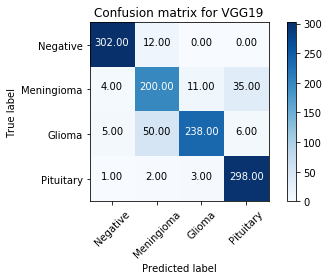

In [73]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions1))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for VGG19')

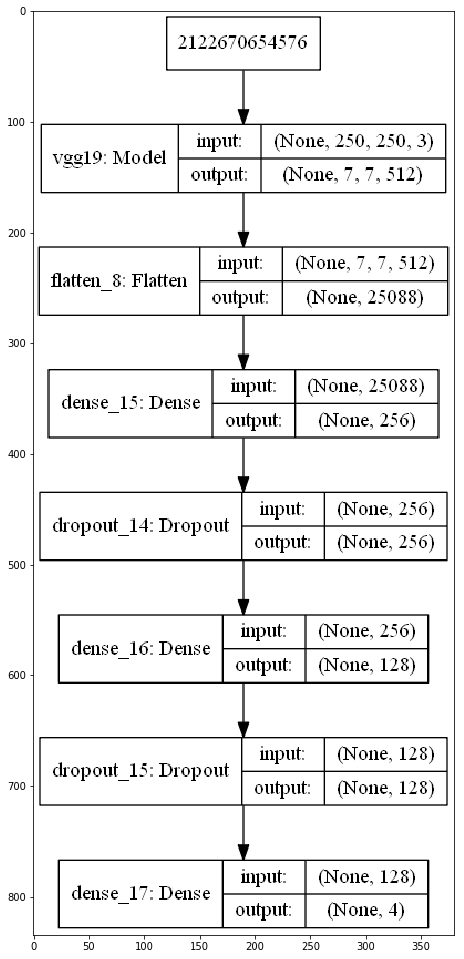

In [75]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model1, to_file='./Model_Architecture/model_4.png', show_shapes=True, show_layer_names=True)
img3 = mpimg.imread('./Model_Architecture/model_4.png')
plt.figure(figsize=(25,17))
imgplot = plt.imshow(img3)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


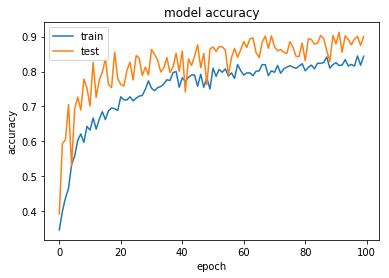

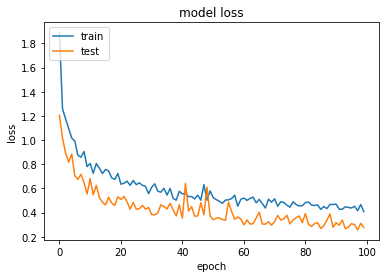

In [76]:
# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---------

## Transfer Learning Xception

In [25]:
import gc 
gc.collect()

30362

In [26]:
from keras.applications.xception import Xception #downloading model for transfer learning
x = Xception(include_top=False ,weights='imagenet',input_shape=(250,250,3))


for layer in x.layers:
    layer.trainable = False


In [27]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, LeakyReLU
from keras.models import Sequential

model2 = Sequential()

model2.add(x)
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(4, activation='softmax'))

model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total para

In [28]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='AdaDelta',
    metrics=['accuracy']
)

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
 

es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=15
)


cp1 = ModelCheckpoint(filepath='./Models/model_5.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [87]:
epochs = 100

batch_size = 32


history4 =model2.fit(X_train_e, Y_train, 
                     validation_data=(X_valid_e, Y_valid),
                     epochs=epochs, batch_size = batch_size, callbacks=[es1, cp1], verbose=2)

Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 67s - loss: 0.0438 - acc: 0.9823 - val_loss: 4.4211 - val_acc: 0.6272

Epoch 00001: val_acc improved from 0.26992 to 0.62725, saving model to ./Models/model_5.h5
Epoch 2/100
 - 54s - loss: 0.0525 - acc: 0.9831 - val_loss: 4.0818 - val_acc: 0.6341

Epoch 00002: val_acc improved from 0.62725 to 0.63410, saving model to ./Models/model_5.h5
Epoch 3/100
 - 54s - loss: 0.0609 - acc: 0.9823 - val_loss: 3.1078 - val_acc: 0.6392

Epoch 00003: val_acc improved from 0.63410 to 0.63925, saving model to ./Models/model_5.h5
Epoch 4/100
 - 54s - loss: 0.0530 - acc: 0.9857 - val_loss: 3.8341 - val_acc: 0.6435

Epoch 00004: val_acc improved from 0.63925 to 0.64353, saving model to ./Models/model_5.h5
Epoch 5/100
 - 54s - loss: 0.0470 - acc: 0.9840 - val_loss: 4.6416 - val_acc: 0.6084

Epoch 00005: val_acc did not improve from 0.64353
Epoch 6/100
 - 54s - loss: 0.0336 - acc: 0.9866 - val_loss: 3.9958 - val_acc: 0.6461

Epoch 00006: val_acc i

In [30]:
# 30 min 30 sec
model2.load_weights('./Models/model_5.h5')

In [33]:
X_test_e = X_test/255.0

In [35]:
_, acc4 = model2.evaluate(X_test_e, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc4)

Model Accuracy: 0.6632


In [36]:
predictions2 = [np.argmax(model2.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████████████████████████████████████████████████████████████████████████| 1167/1167 [03:00<00:00,  5.90it/s]


[[ 22   4   1 248]
 [  7   8   0 292]
 [  6  19   0 255]
 [ 28   0   0 277]]


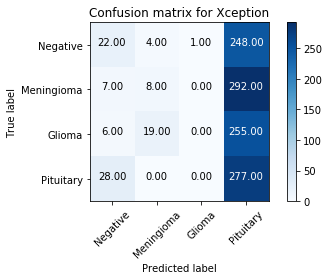

In [39]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions2))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for Xception')

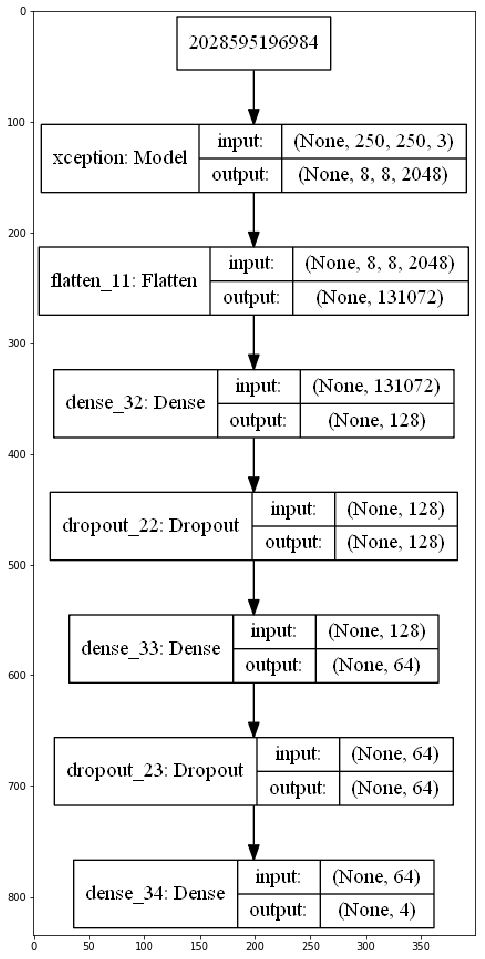

In [93]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model2, to_file='./Model_Architecture/model_5.png', show_shapes=True, show_layer_names=True)
img4 = mpimg.imread('./Model_Architecture/model_5.png')
plt.figure(figsize=(25,17))
imgplot = plt.imshow(img4)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


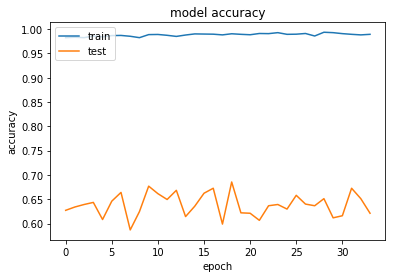

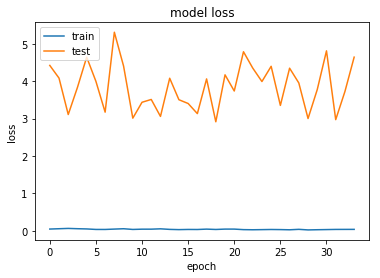

In [94]:
# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

------------

# Transfer Learning VGG19 (with ELU)

In [40]:
import gc 
gc.collect()

41279

In [41]:
from keras.applications.vgg19 import VGG19  #downloading model for transfer learning
i = VGG19(include_top=False ,weights='imagenet',input_shape=(250,250,3))


for layer in i.layers:
    layer.trainable = False


In [42]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, LeakyReLU
from keras.models import Sequential

model3 = Sequential()

model3.add(i)
model3.add(Flatten())

model3.add(Dense(256, activation='elu'))
model3.add(Dropout(0.5))


model3.add(Dense(128, activation='elu'))
model3.add(Dropout(0.5))

model3.add(Dense(64, activation='elu'))
model3.add(Dropout(0.5))

model3.add(Dense(4, activation='softmax'))

model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
__________

In [43]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='AdaDelta',
    metrics=['accuracy']
)

In [44]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
 

es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=15
)


cp1 = ModelCheckpoint(filepath='./Models/model_6.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [31]:
epochs = 100
history5 =model3.fit(X_train, Y_train, 
                     validation_data=(X_valid, Y_valid),
                     epochs=epochs, batch_size = 32, 
                     callbacks=[es1, cp1], verbose=2, shuffle = True)

Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 55s - loss: 10.7514 - acc: 0.3122 - val_loss: 9.3802 - val_acc: 0.4122

Epoch 00001: val_acc improved from -inf to 0.41217, saving model to ./Models/model_6.h5
Epoch 2/100
 - 47s - loss: 9.5837 - acc: 0.3842 - val_loss: 5.5829 - val_acc: 0.6384

Epoch 00002: val_acc improved from 0.41217 to 0.63839, saving model to ./Models/model_6.h5
Epoch 3/100
 - 50s - loss: 8.6142 - acc: 0.4499 - val_loss: 6.5668 - val_acc: 0.5647

Epoch 00003: val_acc did not improve from 0.63839
Epoch 4/100
 - 60s - loss: 7.7323 - acc: 0.5039 - val_loss: 5.7614 - val_acc: 0.6230

Epoch 00004: val_acc did not improve from 0.63839
Epoch 5/100
 - 60s - loss: 7.0046 - acc: 0.5467 - val_loss: 4.4274 - val_acc: 0.7104

Epoch 00005: val_acc improved from 0.63839 to 0.71037, saving model to ./Models/model_6.h5
Epoch 6/100
 - 63s - loss: 6.5960 - acc: 0.5753 - val_loss: 4.3534 - val_acc: 0.7155

Epoch 00006: val_acc improved from 0.71037 to 0.71551, saving mod

In [45]:
# 2 hrs 37 min 54 sec (9474 sec)
model3.load_weights('./Models/model_6.h5')

In [46]:
_, acc5 = model3.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc5)

Model Accuracy: 0.9743


In [47]:
predictions3 = [np.argmax(model3.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████████████████████████████████████████████████████████████████████████| 1167/1167 [02:59<00:00,  6.73it/s]


[[275   0   0   0]
 [  2 292   8   5]
 [  2   8 270   0]
 [  1   4   0 300]]


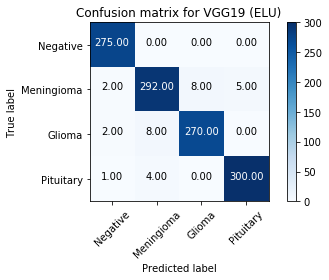

In [48]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions3))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for VGG19 (ELU)')

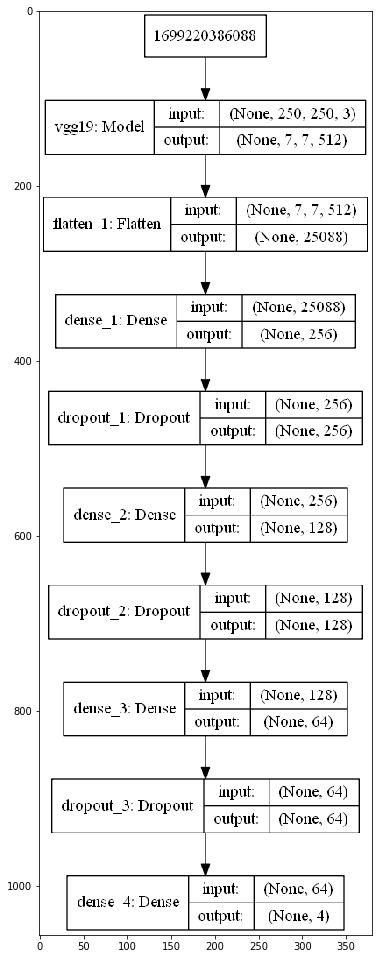

In [38]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model3, to_file='./Model_Architecture/model_6.png', show_shapes=True, show_layer_names=True)
img5 = mpimg.imread('./Model_Architecture/model_6.png')
plt.figure(figsize=(25,17))
imgplot = plt.imshow(img5)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


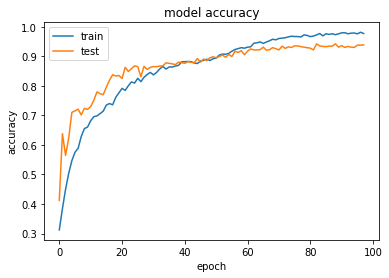

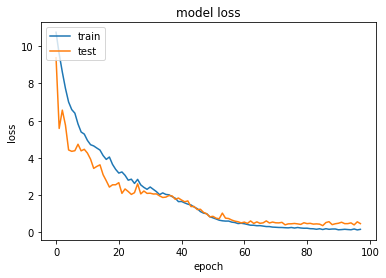

In [39]:
# list all data in history
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

--------------

# Transfer Learning VGG16

In [74]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(250,250,3))


In [75]:

model4 = Sequential()
model4.add(vgg16)
model4.add(layers.Flatten())

model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(4, activation='softmax'))

model4.layers[0].trainable = False


model4.summary()


model4.compile(
    loss='binary_crossentropy',
    optimizer='AdaDelta',
    metrics=['accuracy']
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 516       
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


In [76]:
es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=25
)


cp1 = ModelCheckpoint(filepath='./Models/model_7.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [78]:
epochs = 100
history6 = model4.fit(X_train, Y_train,
          validation_data=(X_valid, Y_valid),
          epochs=epochs,batch_size = 32,callbacks=[es1, cp1], verbose=2,shuffle=True)


Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 53s - loss: 3.5619 - acc: 0.7646 - val_loss: 2.5370 - val_acc: 0.8256

Epoch 00001: val_acc improved from -inf to 0.82562, saving model to ./Models/model_7.h5
Epoch 2/100
 - 41s - loss: 1.8027 - acc: 0.8775 - val_loss: 1.5237 - val_acc: 0.8950

Epoch 00002: val_acc improved from 0.82562 to 0.89503, saving model to ./Models/model_7.h5
Epoch 3/100
 - 41s - loss: 1.3325 - acc: 0.9059 - val_loss: 1.0947 - val_acc: 0.9254

Epoch 00003: val_acc improved from 0.89503 to 0.92545, saving model to ./Models/model_7.h5
Epoch 4/100
 - 42s - loss: 1.1074 - acc: 0.9209 - val_loss: 1.0173 - val_acc: 0.9323

Epoch 00004: val_acc improved from 0.92545 to 0.93231, saving model to ./Models/model_7.h5
Epoch 5/100
 - 49s - loss: 0.9580 - acc: 0.9314 - val_loss: 1.0811 - val_acc: 0.9250

Epoch 00005: val_acc did not improve from 0.93231
Epoch 6/100
 - 49s - loss: 0.8203 - acc: 0.9401 - val_loss: 0.9345 - val_acc: 0.9254

Epoch 00006: val_acc did 

In [79]:
# 5994 sec (1 hr 39 min 54 sec)
model4.load_weights('./Models/model_7.h5')

In [80]:
_, acc6 = model4.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc6)

Model Accuracy: 0.9743


In [81]:
predictions4 = [np.argmax(model4.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████████████████████████████████████████████████████████████████████████| 1167/1167 [00:26<00:00, 43.69it/s]


[[262   1   0   0]
 [  7 270  10  12]
 [  1  22 261   0]
 [  1   6   0 314]]


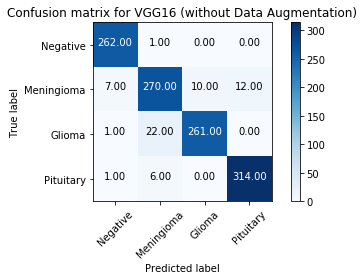

In [82]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions4))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for VGG16 (without Data Augmentation)')

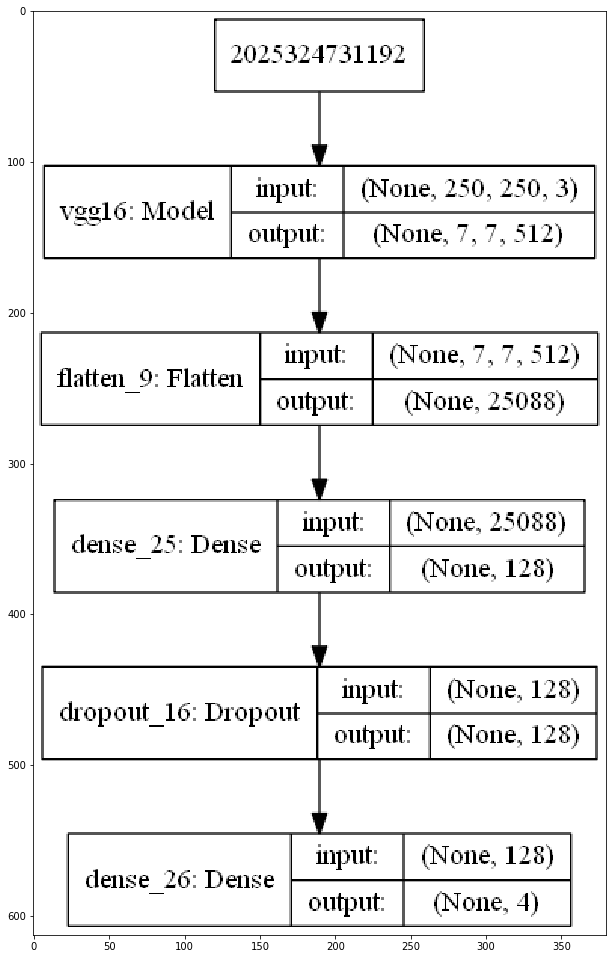

In [83]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model4, to_file='./Model_Architecture/model_7.png', show_shapes=True, show_layer_names=True)
img6 = mpimg.imread('./Model_Architecture/model_7.png')
plt.figure(figsize=(25,17))
imgplot = plt.imshow(img6)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


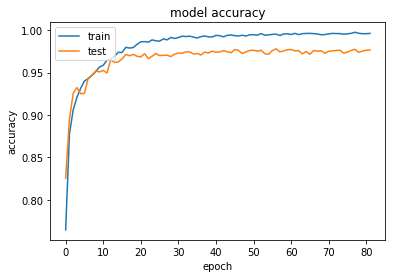

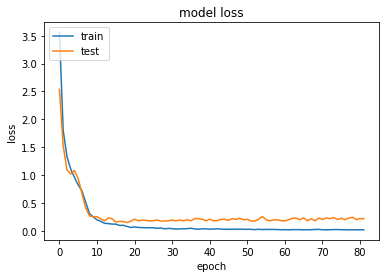

In [85]:
# list all data in history
print(history6.history.keys())
# summarize history for accuracy
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

----------

# Transfer Learning VGG19

In [86]:
from keras.applications.vgg19 import VGG19
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(250,250,3))


In [90]:

model5 = Sequential()
model5.add(vgg19)
model5.add(layers.Flatten())

model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.25))

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.25))
model5.add(layers.Dense(4, activation='softmax'))

model5.layers[0].trainable = False


model5.summary()


model5.compile(
    loss='binary_crossentropy',
    optimizer='AdaDelta',
    metrics=['accuracy']
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 516       
Total para

In [91]:
es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=15
)


cp1 = ModelCheckpoint(filepath='./Models/model_8.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)


In [92]:
epochs = 100
history7 = model5.fit(X_train, Y_train,
          validation_data=(X_valid, Y_valid),
          epochs=epochs,batch_size = 32,callbacks=[es1, cp1], verbose=2,shuffle=True)


Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 70s - loss: 3.7456 - acc: 0.7486 - val_loss: 2.9312 - val_acc: 0.8093

Epoch 00001: val_acc improved from -inf to 0.80934, saving model to ./Models/model_8.h5
Epoch 2/100
 - 63s - loss: 2.3473 - acc: 0.8368 - val_loss: 1.4032 - val_acc: 0.9015

Epoch 00002: val_acc improved from 0.80934 to 0.90146, saving model to ./Models/model_8.h5
Epoch 3/100
 - 69s - loss: 1.5893 - acc: 0.8880 - val_loss: 1.3732 - val_acc: 0.9019

Epoch 00003: val_acc improved from 0.90146 to 0.90189, saving model to ./Models/model_8.h5
Epoch 4/100
 - 68s - loss: 1.0876 - acc: 0.9205 - val_loss: 0.9993 - val_acc: 0.9284

Epoch 00004: val_acc improved from 0.90189 to 0.92845, saving model to ./Models/model_8.h5
Epoch 5/100
 - 69s - loss: 0.9209 - acc: 0.9297 - val_loss: 0.9401 - val_acc: 0.9302

Epoch 00005: val_acc improved from 0.92845 to 0.93016, saving model to ./Models/model_8.h5
Epoch 6/100
 - 68s - loss: 0.8860 - acc: 0.9322 - val_loss: 0.8492 - v

In [93]:
# 1 hr 8 min 53 sec (4133 sec)
model5.load_weights('./Models/model_8.h5')

In [94]:
_, acc7 = model5.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc7)

Model Accuracy: 0.9751


In [95]:
predictions5 = [np.argmax(model5.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████████████████████████████████████████████████████████████████████████| 1167/1167 [00:31<00:00, 41.75it/s]


[[263   0   0   0]
 [  8 266  17   8]
 [  1  14 269   0]
 [  2   8   1 310]]


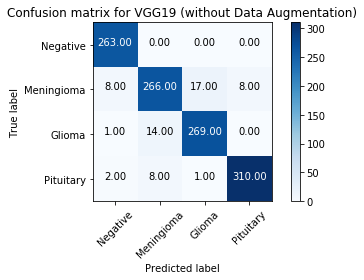

In [96]:
from sklearn.metrics import confusion_matrix
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions5))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for VGG19 (without Data Augmentation)')

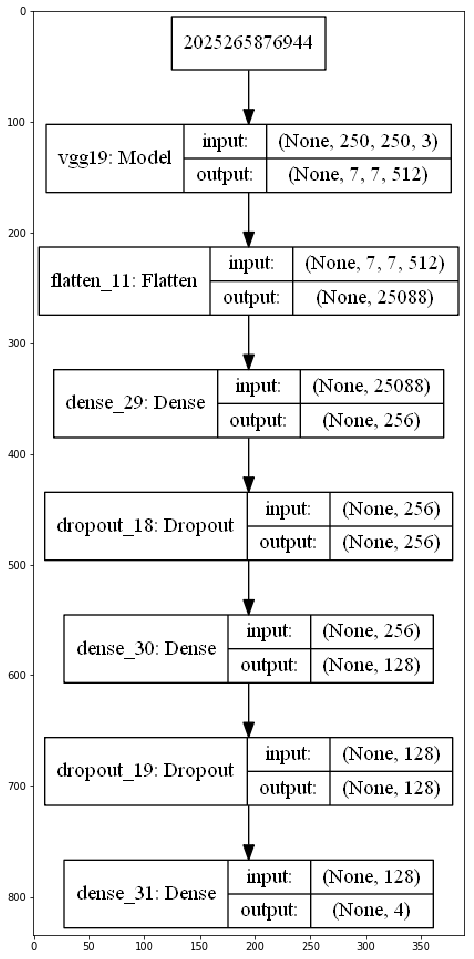

In [97]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model5, to_file='./Model_Architecture/model_8.png', show_shapes=True, show_layer_names=True)
img6 = mpimg.imread('./Model_Architecture/model_8.png')
plt.figure(figsize=(25,17))
imgplot = plt.imshow(img6)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


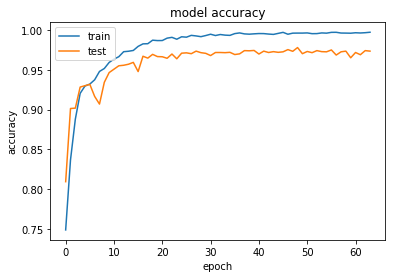

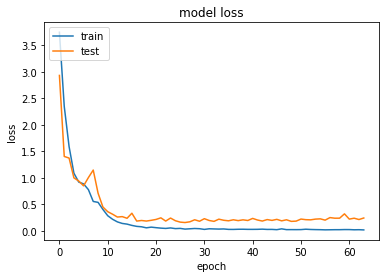

In [98]:
# list all data in history
print(history7.history.keys())
# summarize history for accuracy
plt.plot(history7.history['acc'])
plt.plot(history7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

--------
--------

In [18]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from numpy import argmax

In [40]:
data=np.array(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, data_output_encoded, test_size=0.2, shuffle = True)

#hot encoding them
Y_train_encoded = to_categorical(Y_train, num_classes = 4)
Y_test_encoded = to_categorical(Y_test, num_classes = 4)


print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 4668
Number of test files 1167
Number of train_target files 4668
Number of  test_target  files 1167


In [41]:
Y_test_encoded

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]], dtype=float32)

In [42]:
np.unique(Y_test_encoded)

array([0., 1.], dtype=float32)

In [43]:
unique_rows = np.unique(Y_test_encoded, axis=0)

In [44]:
unique_rows

array([[[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]]], dtype=float32)

In [45]:
unique_rows = np.unique(data_output_encoded, axis=0)
unique_rows

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [46]:
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in n_models:
        
        # define filename for this ensemble
        filename = 'Models/model_' + str(i) + '.h5'
        
        if(filename == 'Models/model_6'):
            layer[0].trainable = False
            model = load_model(filename)
        else:    
            # load model from file
            model = load_model(filename)

        # add to list of members
        all_models.append(model)
        
        print('>loaded %s' % filename)
    return all_models


In [47]:
# define stacked model from multiple member input models
def define_AiCNN(members):

    # update all layers in all models to not be trainable
    for i in range(len(members)):
        
        model = members[i]
        
        
        
        for layer in model.layers:
            
            # make not trainable
            layer.trainable = False
            
            # rename to avoid 'unique layer name' issue
            layer.name = 'ensemble_' + str(i+1) + '_' + layer.name
            

#             if(model == members[6]):
#                 model.get_layer(name="vgg19_input").name="vgg19_1_input"
#             if(model == members[6]):
#                 model.get_layer(name="vgg16_input").name="vgg16_1_input"
#             elif(model == members[7]):
#                 model.get_layer(name="vgg19_input").name="vgg19_2_input"
    # define multi-headed input
    ensemble_visible = [model.input for model in members]
    
    
    
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in members]
    
    merge = concatenate(ensemble_outputs)
    
    hidden1 = Dense(32, activation='relu')(merge)
    hidden2 = Dense(16, activation='relu')(hidden1)

    
    output = Dense(4, activation='softmax')(hidden2)
    
    model = Model(inputs=ensemble_visible, outputs=output)
    
    # plot graph of ensemble
    plot_model(model, show_shapes=True, to_file='Model_Architecture/AiCNN_model.png')
    
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])
    
    

    return model


In [48]:
from keras.callbacks import ModelCheckpoint  #Checkpoint to save the best weights of the model.



# fit a stacked model
def fit_AiCNN(model, inputX, inputy):
    
    # prepare input data
    
    X = [inputX/255.0 if x==2 else inputX for x in range(len(model.input))]
    
    es1 = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=30
    )


    cp1 = ModelCheckpoint(filepath='./Models/AiCNN.h5', 
                               verbose=1,
                               monitor='val_acc', 
                               mode='max',
                               save_best_only=True)
    callbacks_list = [cp1]

    
    # fit model
    final_history = model.fit(X, inputy, validation_split=0.25, batch_size=32,epochs=100,callbacks=callbacks_list, verbose=2)
    
    plt.plot(final_history.history['acc'])
    plt.plot(final_history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(final_history.history['loss'])
    plt.plot(final_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [49]:

# make a prediction with a stacked model
def predict_AiCNN(model, inputX):
    
    # prepare input data
    X = [inputX/255.0 if x==2 else inputX for x in range(len(model.input))]
    
    # make prediction
    return model.predict(X, verbose=0)


In [50]:
print(X_train.shape, X_test.shape)

(4668, 250, 250, 3) (1167, 250, 250, 3)


In [51]:
# load all models
n_members = [1,2,5,7,8]
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded Models/model_1.h5
>loaded Models/model_2.h5
>loaded Models/model_5.h5
>loaded Models/model_7.h5
>loaded Models/model_8.h5
Loaded 5 models


In [52]:
# define ensemble model
AiCNN = define_AiCNN(members)

Train on 3501 samples, validate on 1167 samples
Epoch 1/100
 - 597s - loss: 0.6861 - acc: 0.8600 - val_loss: 0.1878 - val_acc: 0.9837

Epoch 00001: val_acc improved from -inf to 0.98372, saving model to ./Models/AiCNN.h5
Epoch 2/100
 - 196s - loss: 0.0583 - acc: 0.9883 - val_loss: 0.0727 - val_acc: 0.9871

Epoch 00002: val_acc improved from 0.98372 to 0.98715, saving model to ./Models/AiCNN.h5
Epoch 3/100
 - 177s - loss: 0.0390 - acc: 0.9897 - val_loss: 0.0609 - val_acc: 0.9863

Epoch 00003: val_acc did not improve from 0.98715
Epoch 4/100
 - 179s - loss: 0.0384 - acc: 0.9900 - val_loss: 0.0479 - val_acc: 0.9889

Epoch 00004: val_acc improved from 0.98715 to 0.98886, saving model to ./Models/AiCNN.h5
Epoch 5/100
 - 183s - loss: 0.0363 - acc: 0.9906 - val_loss: 0.0442 - val_acc: 0.9880

Epoch 00005: val_acc did not improve from 0.98886
Epoch 6/100
 - 192s - loss: 0.0299 - acc: 0.9911 - val_loss: 0.0406 - val_acc: 0.9889

Epoch 00006: val_acc did not improve from 0.98886
Epoch 7/100
 - 1

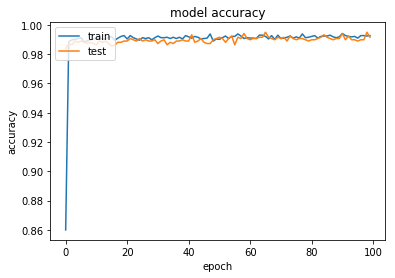

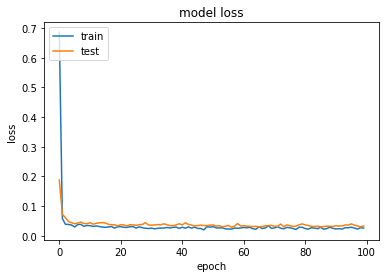

In [27]:
# fit stacked model on test dataset
fit_AiCNN(AiCNN, X_train, Y_train)

In [32]:
# 6 hours 45 min 24 seconds (24324 sec)
AiCNN.load_weights('./Models/AiCNN.h5')

In [ ]:
# make predictions and evaluate
Final_pred = predict_AiCNN(AiCNN, X_test)
Final_pred = argmax(Final_pred, axis=1)

In [ ]:
Final_pred

In [ ]:
Final_pred1 = to_categorical(Final_pred, num_classes = 4)
Final_pred1

In [ ]:
final_acc = accuracy_score(Y_test, Final_pred1)
print('AiCNN Test Accuracy: %.5f' % final_acc)

# Final_pred = [np.argmax(AiCNN.predict(np.expand_dims(feature, axis=1))) for feature in tqdm(X_test)]
# _, final_acc = AiCNN.evaluate(X_test, Y_test, verbose=0)
# print('Model Accuracy: %.4f' % final_acc)

In [ ]:
import itertools #create iterators for effective looping
#Plotting the confusion matrix for checking the accuracy of the model
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    print(cm)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
%matplotlib inline
class_names=["Negative","Meningioma","Glioma","Pituitary"]
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(Final_pred))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix for AiCNNs')

In [55]:
import gc
gc.collect()

49368

----------
----------
----------